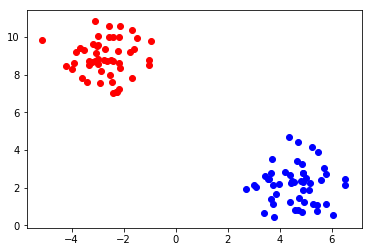

In [34]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=10, centers=2,random_state=42)
# print(X)
# plot the cluster 0 in red
plt.scatter(X[y==0,0],X[y==0,1],c='red')
#plot the cluster 1 in blue
plt.scatter(X[y==1,0],X[y==1,1],c='blue')
plt.show()

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print('length of Training data : ',X_train[:,0].size)

length of Training data :  7


In [4]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

model = Sequential()
model.add(Dense(1, input_shape=(2,), activation="sigmoid"))
model.compile(Adam(lr=0.03),'binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,epochs=100,verbose=0) # change the verbose to 1 to view the algo progress
eval_result = model.evaluate(X_test,y_test)

print("\n\nTest Loss : ",eval_result[0], ' , Test Accuracy :',eval_result[1])

Using TensorFlow backend.


3/3 [==============================] - 0s 5ms/step


Test Loss :  0.0086223827675  , Test Accuracy : 1.0


amin --  -3.07867200899    bmin -- 0.448421497727
amax --  6.20552760515    bmax -- 9.88172085735


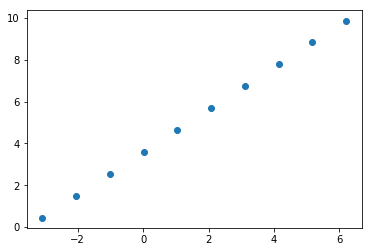

In [5]:
amin, bmin = X.min(axis=0) - 0.1
amax, bmax = X.max(axis=0) + 0.1
print('amin -- ',amin,'   bmin --',bmin)
print('amax -- ',amax,'   bmax --',bmax)
hticks = np.linspace(amin, amax, 10) #101
vticks = np.linspace(bmin, bmax, 10) #101

plt.scatter(hticks,vticks)
plt.show()

In [9]:
aa, bb = np.meshgrid(hticks, vticks)
# print(hticks)
# print(aa)
print(vticks)
print(bb)

[ 0.4484215   1.49656587  2.54471024  3.59285462  4.64099899  5.68914336
  6.73728774  7.78543211  8.83357648  9.88172086]
[[ 0.4484215   0.4484215   0.4484215   0.4484215   0.4484215   0.4484215
   0.4484215   0.4484215   0.4484215   0.4484215 ]
 [ 1.49656587  1.49656587  1.49656587  1.49656587  1.49656587  1.49656587
   1.49656587  1.49656587  1.49656587  1.49656587]
 [ 2.54471024  2.54471024  2.54471024  2.54471024  2.54471024  2.54471024
   2.54471024  2.54471024  2.54471024  2.54471024]
 [ 3.59285462  3.59285462  3.59285462  3.59285462  3.59285462  3.59285462
   3.59285462  3.59285462  3.59285462  3.59285462]
 [ 4.64099899  4.64099899  4.64099899  4.64099899  4.64099899  4.64099899
   4.64099899  4.64099899  4.64099899  4.64099899]
 [ 5.68914336  5.68914336  5.68914336  5.68914336  5.68914336  5.68914336
   5.68914336  5.68914336  5.68914336  5.68914336]
 [ 6.73728774  6.73728774  6.73728774  6.73728774  6.73728774  6.73728774
   6.73728774  6.73728774  6.73728774  6.73728774]
 [ 

In [24]:
ab = np.c_[aa.ravel(), bb.ravel()]
# print(bb.ravel())
print(ab[:5])

[[-3.07867201  0.4484215 ]
 [-2.04709427  0.4484215 ]
 [-1.01551654  0.4484215 ]
 [ 0.0160612   0.4484215 ]
 [ 1.04763893  0.4484215 ]]


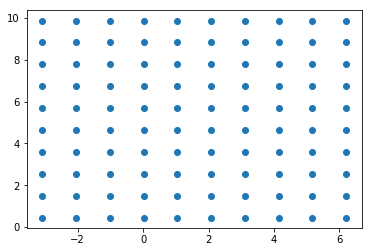

In [17]:
plt.scatter(ab[:,0],ab[:,1])
plt.show()

In [26]:
c = model.predict(ab)
print(c[:15])

[[ 0.01744642]
 [ 0.0556559 ]
 [ 0.16361338]
 [ 0.39368054]
 [ 0.6830557 ]
 [ 0.87734967]
 [ 0.95958447]
 [ 0.98746979]
 [ 0.9961915 ]
 [ 0.99884951]
 [ 0.01360594]
 [ 0.0437791 ]
 [ 0.13191698]
 [ 0.33528063]
 [ 0.62605292]]


In [20]:
print(aa.shape)

(10, 10)


In [25]:
Z = c.reshape(aa.shape)
print(Z[:5])

[[ 0.01744642  0.0556559   0.16361338  0.39368054  0.6830557   0.87734967
   0.95958447  0.98746979  0.9961915   0.99884951]
 [ 0.01360594  0.0437791   0.13191698  0.33528063  0.62605292  0.84748864
   0.94857109  0.98392802  0.99510276  0.99851948]
 [ 0.01060173  0.03434459  0.10558584  0.2815215   0.56532216  0.81191599
   0.93476051  0.97940594  0.99370486  0.99809498]
 [ 0.00825531  0.02688608  0.08400194  0.23335609  0.50256515  0.77029514
   0.91756374  0.97364569  0.99191099  0.99754912]
 [ 0.00642483  0.02101207  0.06650214  0.19123785  0.43972719  0.72261065
   0.8963365   0.96632951  0.98961139  0.99684721]]
